<div class="alert alert-block alert-info">
<h1>Exploratory data analysis : <code>1-explore_data.ipynb</code></h1>
</div>

---

## The aim of this notebook is to explore the peak table cleaned in the previous notebook (1-clean_RPpos_peakTable) with a few visualisations on target (here the Sample Group), missing values, distributions, ...

### Basic ckecklist :

#### Form analysis :
- __target__ : *Disease* column in metadata
- __shape (rows & columns)__ : ... rows (samples) x ... columns (... metadata and ... compounds)
- __features types__ :
    - metadata :
        - qualitative : ...
        - quantitative :
            - int : ...
            - float : ...
    - variables :    
        - quantitative (type ...) : ...
- __missing values__ :
    - example :
        - compounds can be in every sample (0% of missing values), in most of them or just in a few
        - the maximum of missing value for a variable is ...%, i.e. this variable is absent from ...% of the samples
        - (samples seem to be more easily separated with not too much missing values (logic))

#### Content analysis :
- __target visualisation__ :
    - example : ratio 1:1 (... Cancer - ... Healthy)
- __feature visualisation__ :
    - example :
        - follow a normal distribution or not
        - some of them follow a double normal distribution
        - maybe one distribution for each class (Healthy vs Cancer) --> hypothesis
- __relation features/target__ :
    - example : don't see a clear difference of intensity between the two classes of samples
- __relation features/features__ : strong correlations between some of the features --> need to reduce the dimension for further analysis

---

# Table of contents
- [0 - Import modules](#0---Import-modules)
- [0 - Import useful functions](#0---Import-useful-functions)
- [0 - Import peak table](#0---Import-peak-table)
- [1 - Feature/Variable types](#1---Feature/Variable-types)
- [2 - Missing values exploration](#2---Missing-values-exploration)
- [3 - Correlation between features](#3---Correlation-between-features)
- [4 - Remove strongly correlated features (to potentially avoid issues during further analysis)](#4---Remove-strongly-correlated-features-(to-potentially-avoid-issues-during-further-analysis))
- [5 - Target visualisation](#5---Target-visualisation)
- [6 - PCA](#6---PCA)
- [7 - Metadata visualisation](#7---Metadata-visualisation)
- [8 - Feature visualisation](#8---Feature-visualisation)
  - [a - Pairplot](#a---Pairplot)
  - [b - Histogram and boxplot](#b---Histogram-and-boxplot)
---

# 0 - Import modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
# Setting working directory
import re
pwd = ! pwd
pwd = re.sub('notebooks/', '', pwd[0])
pwd = '/'.join(pwd.split('/')[:-1]) + '/'
print(f'Working directory : {pwd}')

# Print Python version
python_version = ! python --version
print(f'Python version : {python_version[0]}')

Working directory : /home/jovyan/work/
Python version : Python 3.10.4


In [3]:
# Tune the visual settings for figures in seaborn
sns.set_context(
    "notebook", font_scale=1.2, rc={"figure.figsize": (15,8), "axes.titlesize": 15}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 15, 8

sns.set_theme(style="darkgrid")

# 0 - Import useful functions

In [4]:
# In the bin folder, python scripts containing useful functions can be found.
# Functions for data exploration are located in file explore_data_functions.py

import sys
sys.path.append(pwd + 'bin/')

from explore_data_functions import *

# 0 - Import peak table

In [5]:
# We store the imported peak table and set a copy in an other dataframe
# We can have access to the initial peak table any time
# Hint : It is always better to manipulate a copy than the original dataframe

peakTable_imported = pd.read_csv(pwd + 'data/synthetic_dataset/synthetic_dataset.csv')
peakTable = peakTable_imported.copy()
peakTable

SampleID Disease   variable_1  variable_2  variable_3   variable_4  \
0    CRR_001     CRR   227.826520  117.012086  750.015310   106.848690   
1    CRR_002     CRR   587.927618  129.710850  594.600666   145.488720   
2    CRR_003     CRR   300.819627  208.803545  649.198550    99.151068   
3    CRR_004     CRR   574.124723  225.087555  586.409285   115.209639   
4    CRR_005     CRR   235.369264  123.061042  638.782555    46.975815   
..       ...     ...          ...         ...         ...          ...   
595  HCC_296     HCC  1307.377728  187.166724  330.124145  1100.770379   
596  HCC_297     HCC   714.674697   88.631286  295.155447   217.305148   
597  HCC_298     HCC  1034.242121  699.345217  380.957087   604.125654   
598  HCC_299     HCC   870.037466   28.948919  177.750685   323.497432   
599  HCC_300     HCC  1282.332591  531.145158  229.488492   219.229400   

     variable_5  variable_6  variable_7   variable_8  ...  variable_1577  \
0    941.250268   28.308256   46.263365  1744.688754  ...     117.048909   
1    896.401881   27.842101   73.665886  1551.050083  ...      50.584648   
2    634.809418    7.656808  211.861276  1555.589994  ...    1089.312467   
3    628.911754   15.336427   94.711215  1643.625627  ...     736.010883   
4    724.054416   13.855861   85.444824  2163.577857  ...     823.516022   
..          ...         ...         ...          ...  ...            ...   
595  610.444945  731.605822  783.995362   804.098475  ...      57.150859   
596  369.804011  252.653913  216.791172   462.004967  ...     436.123263   
597  431.331251  309.331561  460.046415   887.358755  ...     597.447460   
598  299.576371  459.865707  405.623088   333.229357  ...     111.664751   
599  470.301701  436.816468  841.020699   633.950770  ...     191.351863   

     variable_1578  variable_1579  variable_1580  variable_1581  \
0       110.748825      80.852314     119.651776      63.011187   
1        52.091682      27.073475     404.589261     223.520876   
2       973.212340     684.069033      53.766313      36.772482   
3       640.753562     425.683809     199.182059     171.915040   
4       733.526881     451.732800      38.935205      26.444248   
..             ...            ...            ...            ...   
595      51.372224      29.441535    1061.482416     592.244268   
596     436.823604     298.912809     164.834479      82.281647   
597     475.420263     382.467629     673.222703     408.033315   
598      72.172467      77.487000     271.474553     132.942179   
599     177.718416     108.151278    1370.690313     712.384625   

     variable_1582  variable_1583  variable_1584  variable_1585  variable_1586  
0        26.585824      21.705315       6.753184       2.135420      66.874281  
1       442.007981     402.357357     281.384643     128.797298      47.651690  
2        73.277593      82.923874      48.477574      27.772260      79.759019  
3       378.966138     363.615723     237.023087      83.511193      77.333393  
4        58.087234      88.401438      44.122230      11.595575      99.323196  
..             ...            ...            ...            ...            ...  
595    2115.538082    2081.728788    1291.277109     510.229702       2.647693  
596     426.529882     423.810719     262.165306     100.734624      30.915195  
597    1557.649469    1529.777612     913.724582     406.695045     346.117973  
598     576.984071     610.246760     348.003860     196.035401      47.664480  
599    2210.586222    2224.060501    1453.014674     550.414238     149.751408  

[600 rows x 1588 columns]

In [6]:
peakTable.shape

(600, 1588)

The peak table contains 600 rows (samples), 1588 columns (2 for metadata and 1586 compounds)

### Keep only intensities in the following dataframe

In [7]:
intensities = peakTable.iloc[:, ['variable' in col for col in peakTable.columns]]
intensities.head()

variable_1  variable_2  variable_3  variable_4  variable_5  variable_6  \
0  227.826520  117.012086  750.015310  106.848690  941.250268   28.308256   
1  587.927618  129.710850  594.600666  145.488720  896.401881   27.842101   
2  300.819627  208.803545  649.198550   99.151068  634.809418    7.656808   
3  574.124723  225.087555  586.409285  115.209639  628.911754   15.336427   
4  235.369264  123.061042  638.782555   46.975815  724.054416   13.855861   

   variable_7   variable_8  variable_9  variable_10  ...  variable_1577  \
0   46.263365  1744.688754  109.607280  1474.590504  ...     117.048909   
1   73.665886  1551.050083   92.467096  1443.736018  ...      50.584648   
2  211.861276  1555.589994  459.127995  1424.382600  ...    1089.312467   
3   94.711215  1643.625627  389.919091  1537.402022  ...     736.010883   
4   85.444824  2163.577857  485.004097   452.314008  ...     823.516022   

   variable_1578  variable_1579  variable_1580  variable_1581  variable_1582  \
0     110.748825      80.852314     119.651776      63.011187      26.585824   
1      52.091682      27.073475     404.589261     223.520876     442.007981   
2     973.212340     684.069033      53.766313      36.772482      73.277593   
3     640.753562     425.683809     199.182059     171.915040     378.966138   
4     733.526881     451.732800      38.935205      26.444248      58.087234   

   variable_1583  variable_1584  variable_1585  variable_1586  
0      21.705315       6.753184       2.135420      66.874281  
1     402.357357     281.384643     128.797298      47.651690  
2      82.923874      48.477574      27.772260      79.759019  
3     363.615723     237.023087      83.511193      77.333393  
4      88.401438      44.122230      11.595575      99.323196  

[5 rows x 1586 columns]

In [8]:
intensities.shape

(600, 1586)

### Keep only metadata in the following dataframe

In [9]:
metadata = peakTable.drop(intensities.columns, axis=1)
metadata

SampleID Disease
0    CRR_001     CRR
1    CRR_002     CRR
2    CRR_003     CRR
3    CRR_004     CRR
4    CRR_005     CRR
..       ...     ...
595  HCC_296     HCC
596  HCC_297     HCC
597  HCC_298     HCC
598  HCC_299     HCC
599  HCC_300     HCC

[600 rows x 2 columns]

In [10]:
metadata.shape

(600, 2)

# 1 - Feature/Variable types

In [11]:
# Count number of occurences of each variable type
peakTable.dtypes.value_counts()

float64    1586
object        2
dtype: int64

In [12]:
# Check which variables are of type float64
peakTable.dtypes[peakTable.dtypes == 'float64']

variable_1       float64
variable_2       float64
variable_3       float64
variable_4       float64
variable_5       float64
                  ...   
variable_1582    float64
variable_1583    float64
variable_1584    float64
variable_1585    float64
variable_1586    float64
Length: 1586, dtype: object

In [13]:
# Check which variables are of type object (i.e. qualitative)
peakTable.dtypes[peakTable.dtypes == 'object']

SampleID    object
Disease     object
dtype: object

######################################################################################################################################################
Data types : 
float64    1586
object        2
dtype: int64



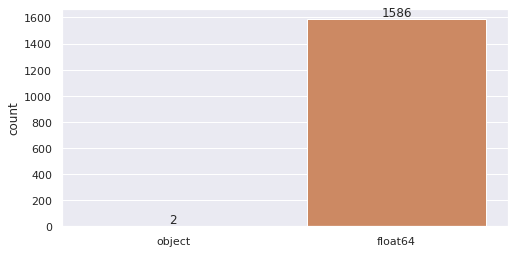

######################################################################################################################################################


In [14]:
# Call plot_feature_types function from explore_data_functions.py script to plot barplot of feature types
plot_feature_types(peakTable)

# 2 - Missing values exploration

Function <code>plot_infos_missing_values</code> plots information about missing values in the peak table : total number of missing values, percent of missing values, plot heatmap, part of samples missing each compound, ...

In [15]:
# Call plot_infos_missing_values function from explore_data_functions.py script to get information on missing data
plot_infos_missing_values(intensities)

######################################################################################################################################################
Considering None as missing values :
- Total number of missing values : 0
- Percent of missing values : 0.00%



0

The function considers <code>None</code> as missing values, but we can check manually in the data and pass the <code>na_values</code> argument to get the correct information.

######################################################################################################################################################
Considering 0 as missing values :
- Total number of missing values : 4351
- Percent of missing values : 0.46%



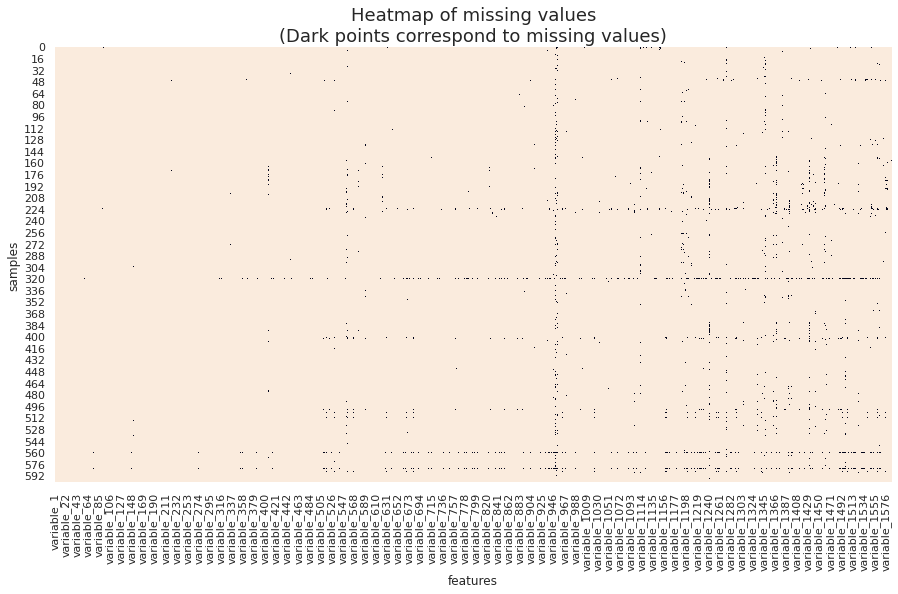

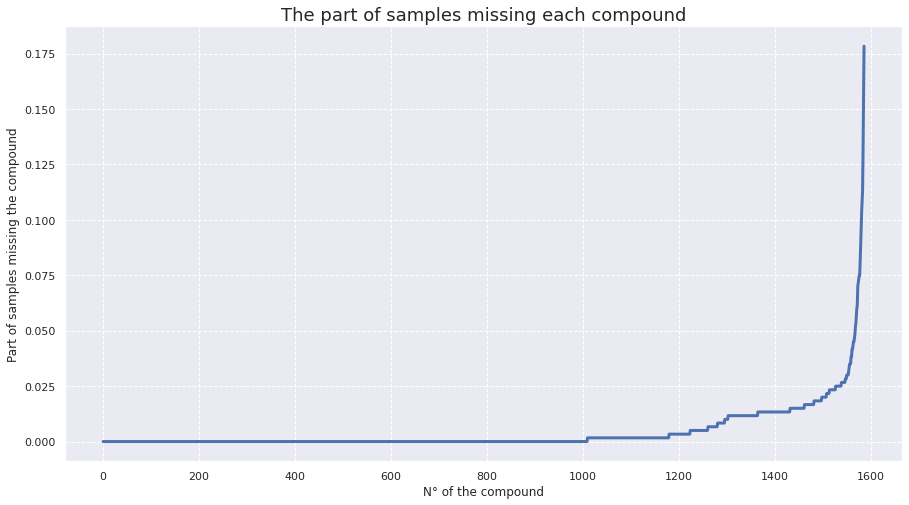



######################################################################################################################################################


In [16]:
# In our data, missing values are set to 0
plot_infos_missing_values(intensities, na_values=0)

# 3 - Correlation between features

Function <code>plot_correlation_matrix</code> plots two matrices about correlation between features in the peak table :
- correlation values on the first plot
- highly correlated features on the second plot. Light points correspond to feature pairs with an absolute correlation value above the threshold passed as argument in the function.

We can use different methods in the function <code>plot_correlation_matrix</code> :
- <code>pearson</code> : measures the linear relationship between two variables
- <code>spearman</code> : measures the statistical dependence between the rankings of two variables i.e. described using a monotonic function
- <code>kendall</code> : also measures a rank correlation

Spearman and Kendall methods are more robust because they don't make the assumption that the data follows a normal distribution.

######################################################################################################################################################


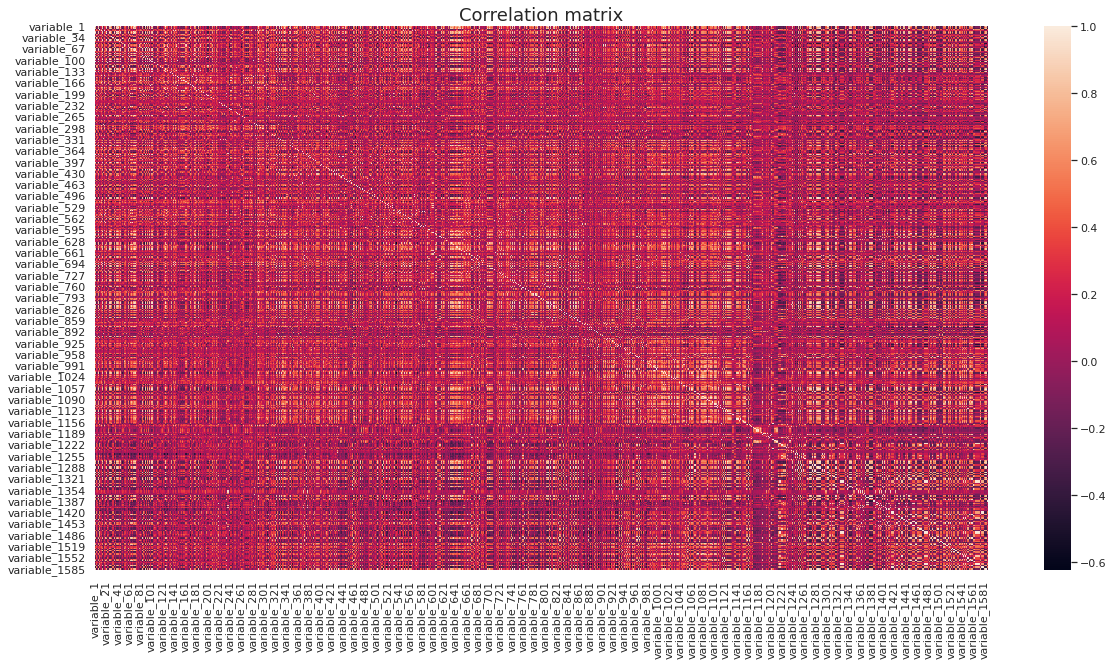

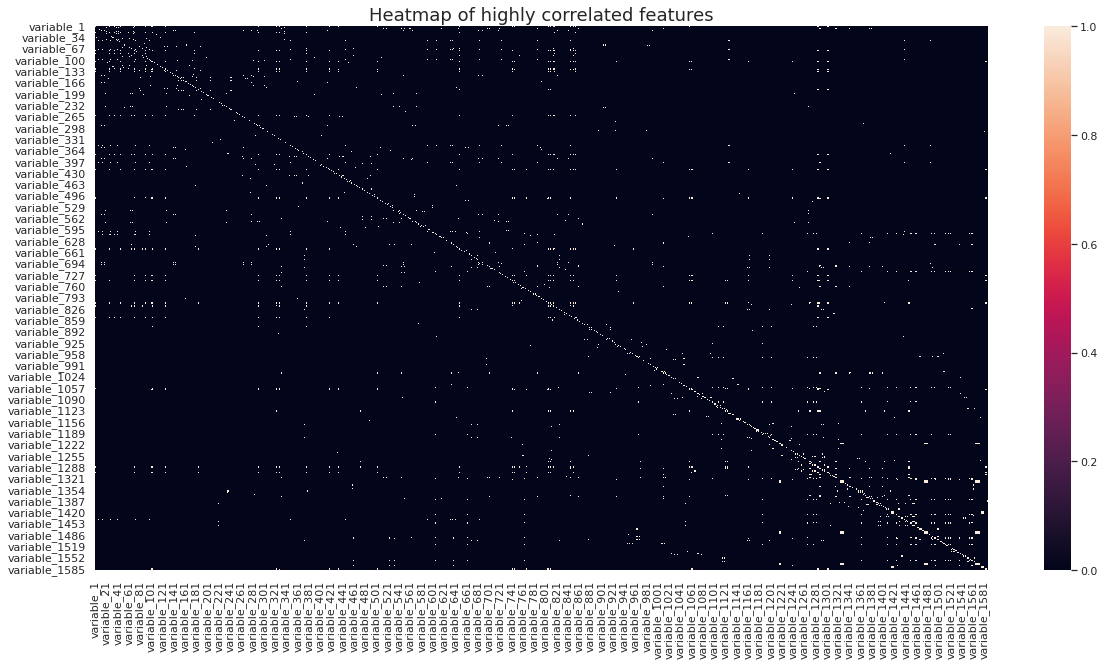



###################################################################################################################################################### 



In [17]:
plot_correlation_matrix(intensities, threshold=0.9, method='pearson')

######################################################################################################################################################


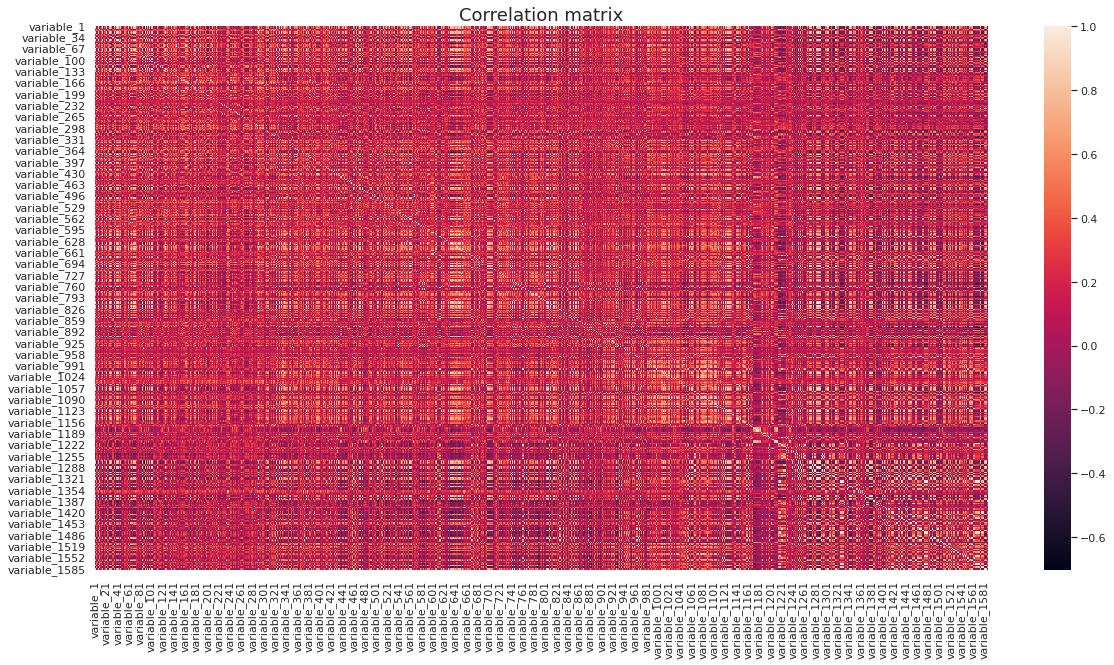

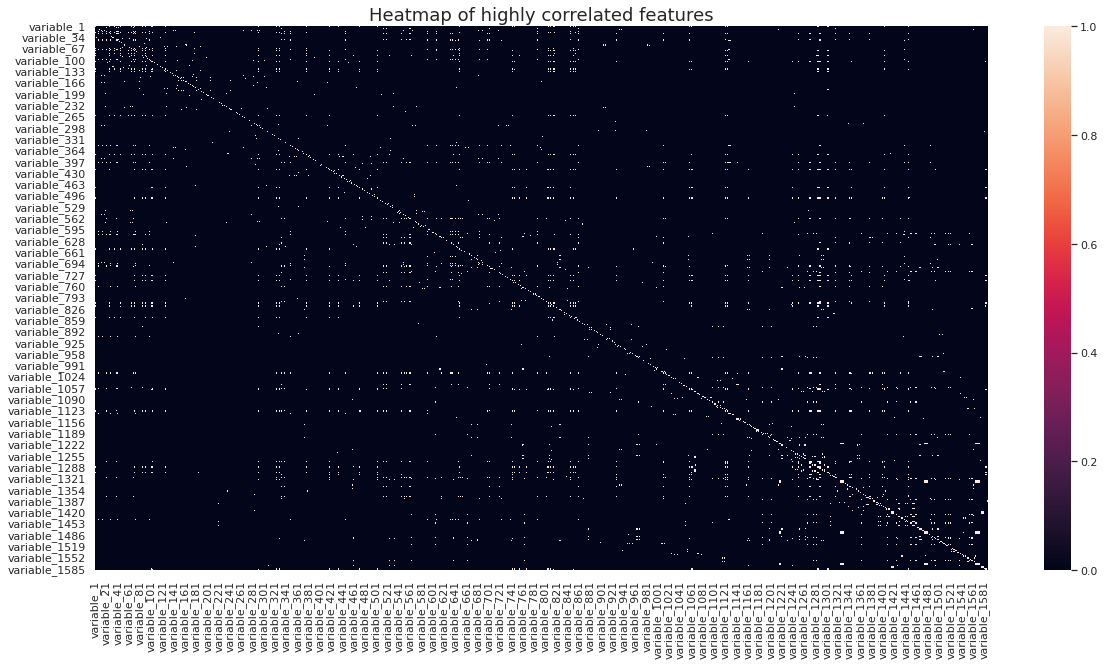



###################################################################################################################################################### 



In [18]:
plot_correlation_matrix(intensities, threshold=0.9, method='spearman')

# 4 - Remove strongly correlated features (to potentially avoid issues during further analysis)

Function <code>remove_correlated_features</code> removes features that are too strongly correlated (above the threshold value passed as argument). Indeed, high correlation values mean features are linearly dependent with other features, which can yield to multicollinearity and a worse predicitive abilities for machine learning models. It is also a way to reduce dimension and avoid the curse of dimensionality.

In [19]:
intensities_remove_corr = remove_correlated_features(intensities, threshold=0.9, method='pearson')
intensities_remove_corr

Initial shape : (600, 1586)
Final shape : (600, 587)

Time to compute : 00h00m04s

 ######################################################################################################################################################






variable_1  variable_2  variable_3   variable_4  variable_5  variable_6  \
0     227.826520  117.012086  750.015310   106.848690  941.250268   28.308256   
1     587.927618  129.710850  594.600666   145.488720  896.401881   27.842101   
2     300.819627  208.803545  649.198550    99.151068  634.809418    7.656808   
3     574.124723  225.087555  586.409285   115.209639  628.911754   15.336427   
4     235.369264  123.061042  638.782555    46.975815  724.054416   13.855861   
..           ...         ...         ...          ...         ...         ...   
595  1307.377728  187.166724  330.124145  1100.770379  610.444945  731.605822   
596   714.674697   88.631286  295.155447   217.305148  369.804011  252.653913   
597  1034.242121  699.345217  380.957087   604.125654  431.331251  309.331561   
598   870.037466   28.948919  177.750685   323.497432  299.576371  459.865707   
599  1282.332591  531.145158  229.488492   219.229400  470.301701  436.816468   

     variable_7   variable_8  variable_9  variable_10  ...  variable_1505  \
0     46.263365  1744.688754  109.607280  1474.590504  ...   23332.588540   
1     73.665886  1551.050083   92.467096  1443.736018  ...   19571.422043   
2    211.861276  1555.589994  459.127995  1424.382600  ...    3825.640322   
3     94.711215  1643.625627  389.919091  1537.402022  ...    3900.435683   
4     85.444824  2163.577857  485.004097   452.314008  ...     402.489171   
..          ...          ...         ...          ...  ...            ...   
595  783.995362   804.098475   98.863618   284.142056  ...     473.805391   
596  216.791172   462.004967  291.308280    49.491236  ...    1839.941207   
597  460.046415   887.358755  278.464080  1454.364558  ...     149.149811   
598  405.623088   333.229357  182.355646    56.180547  ...     822.090326   
599  841.020699   633.950770  238.853592  1408.504373  ...     678.923790   

     variable_1513  variable_1518  variable_1519  variable_1521  \
0       345.695685       0.000000       0.000000       0.000000   
1       242.840315       1.981778       0.000000       4.669376   
2      1136.728114     301.778637     250.099082     190.029159   
3       777.466659     312.186350     299.824366     266.307245   
4      1393.864687     202.706069     176.957407     158.474161   
..             ...            ...            ...            ...   
595     354.091994     246.883160     176.488767     175.813061   
596     519.450121     114.346408      83.062311      89.827003   
597     703.127195     371.898553     286.148673     261.366945   
598     388.178444      44.474945      50.019532      62.189603   
599     347.739919     301.950511     240.568143     197.926804   

     variable_1524  variable_1528  variable_1533  variable_1540  variable_1564  
0         5.194313     166.610410      77.783406       8.630945      62.252431  
1       112.927400     180.437923      53.271213     118.352041      73.772876  
2       350.832313     293.545028     263.923145     356.792481      53.630690  
3       101.532018     338.136807     203.295067     188.081878      71.392762  
4       200.285709     769.535852     289.908010     515.551782      46.859103  
..             ...            ...            ...            ...            ...  
595     331.700933     787.599359      19.945047     456.842307      55.751046  
596     309.682566     348.038788      83.925800     365.545100      46.222988  
597     351.607766     514.511997     111.443139    1045.644800      97.461422  
598     467.290703     181.126309      13.391195     410.875464      33.517221  
599     356.930320     412.957830      92.962586     595.520536      53.780550  

[600 rows x 587 columns]

######################################################################################################################################################


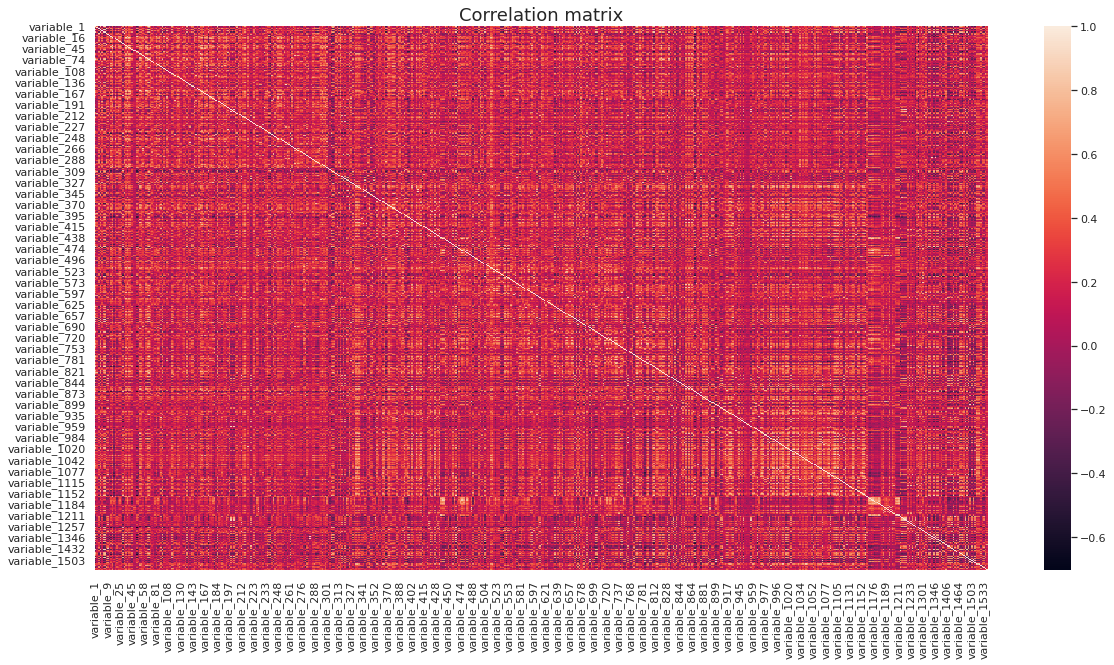

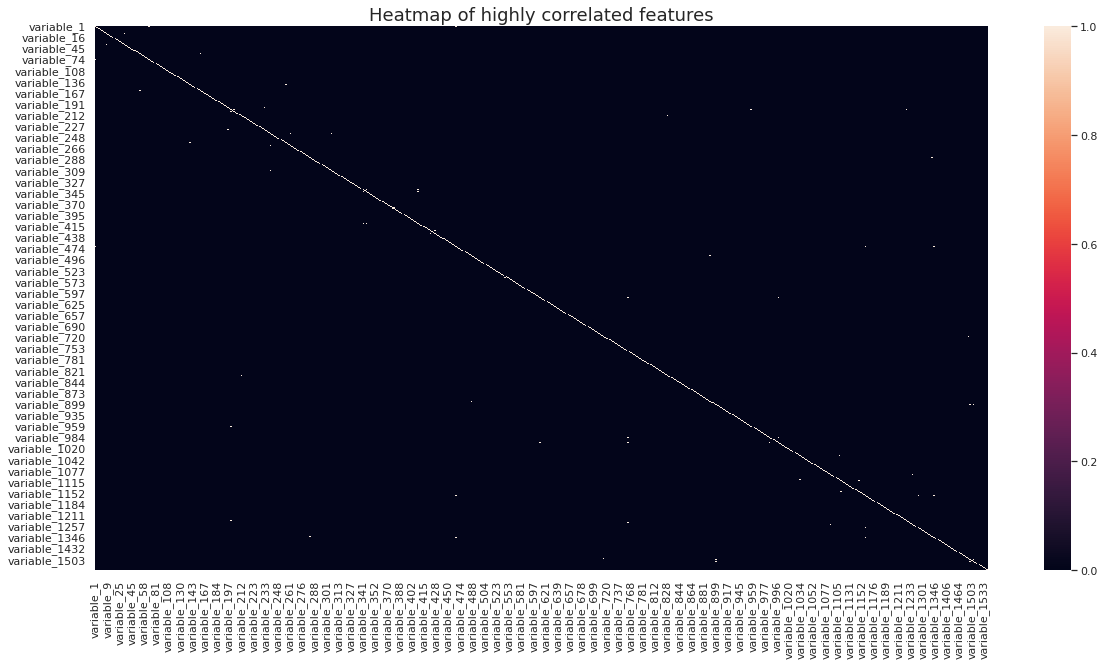



###################################################################################################################################################### 



In [20]:
plot_correlation_matrix(intensities_remove_corr, threshold=0.9)

After highly correlated features removal, we have 780 features remaining.

In [21]:
# Here we can concatenate the metadata and the intensities table without highly correlated features
peakTable_remove_corr = pd.concat([metadata, intensities_remove_corr], axis=1)
display(peakTable_remove_corr)
filename = 'synthetic_dataset_remove_corr.csv'
peakTable_remove_corr.to_csv(pwd + 'data/synthetic_dataset/' + filename, index = False, header=True)
print(f'Peak table with strongly correlated features removed, {filename} saved in {pwd}data/synthetic_dataset/')

SampleID Disease   variable_1  variable_2  variable_3   variable_4  \
0    CRR_001     CRR   227.826520  117.012086  750.015310   106.848690   
1    CRR_002     CRR   587.927618  129.710850  594.600666   145.488720   
2    CRR_003     CRR   300.819627  208.803545  649.198550    99.151068   
3    CRR_004     CRR   574.124723  225.087555  586.409285   115.209639   
4    CRR_005     CRR   235.369264  123.061042  638.782555    46.975815   
..       ...     ...          ...         ...         ...          ...   
595  HCC_296     HCC  1307.377728  187.166724  330.124145  1100.770379   
596  HCC_297     HCC   714.674697   88.631286  295.155447   217.305148   
597  HCC_298     HCC  1034.242121  699.345217  380.957087   604.125654   
598  HCC_299     HCC   870.037466   28.948919  177.750685   323.497432   
599  HCC_300     HCC  1282.332591  531.145158  229.488492   219.229400   

     variable_5  variable_6  variable_7   variable_8  ...  variable_1505  \
0    941.250268   28.308256   46.263365  1744.688754  ...   23332.588540   
1    896.401881   27.842101   73.665886  1551.050083  ...   19571.422043   
2    634.809418    7.656808  211.861276  1555.589994  ...    3825.640322   
3    628.911754   15.336427   94.711215  1643.625627  ...    3900.435683   
4    724.054416   13.855861   85.444824  2163.577857  ...     402.489171   
..          ...         ...         ...          ...  ...            ...   
595  610.444945  731.605822  783.995362   804.098475  ...     473.805391   
596  369.804011  252.653913  216.791172   462.004967  ...    1839.941207   
597  431.331251  309.331561  460.046415   887.358755  ...     149.149811   
598  299.576371  459.865707  405.623088   333.229357  ...     822.090326   
599  470.301701  436.816468  841.020699   633.950770  ...     678.923790   

     variable_1513  variable_1518  variable_1519  variable_1521  \
0       345.695685       0.000000       0.000000       0.000000   
1       242.840315       1.981778       0.000000       4.669376   
2      1136.728114     301.778637     250.099082     190.029159   
3       777.466659     312.186350     299.824366     266.307245   
4      1393.864687     202.706069     176.957407     158.474161   
..             ...            ...            ...            ...   
595     354.091994     246.883160     176.488767     175.813061   
596     519.450121     114.346408      83.062311      89.827003   
597     703.127195     371.898553     286.148673     261.366945   
598     388.178444      44.474945      50.019532      62.189603   
599     347.739919     301.950511     240.568143     197.926804   

     variable_1524  variable_1528  variable_1533  variable_1540  variable_1564  
0         5.194313     166.610410      77.783406       8.630945      62.252431  
1       112.927400     180.437923      53.271213     118.352041      73.772876  
2       350.832313     293.545028     263.923145     356.792481      53.630690  
3       101.532018     338.136807     203.295067     188.081878      71.392762  
4       200.285709     769.535852     289.908010     515.551782      46.859103  
..             ...            ...            ...            ...            ...  
595     331.700933     787.599359      19.945047     456.842307      55.751046  
596     309.682566     348.038788      83.925800     365.545100      46.222988  
597     351.607766     514.511997     111.443139    1045.644800      97.461422  
598     467.290703     181.126309      13.391195     410.875464      33.517221  
599     356.930320     412.957830      92.962586     595.520536      53.780550  

[600 rows x 589 columns]

Peak table with strongly correlated features removed, synthetic_dataset_remove_corr.csv saved in /home/jovyan/work/data/synthetic_dataset/


# 5 - Target visualisation

### Our target here is <code>Disease</code> column in metadata, let's create a variable <code>target</code>

In [22]:
target = metadata['Disease']
target

0      CRR
1      CRR
2      CRR
3      CRR
4      CRR
      ... 
595    HCC
596    HCC
597    HCC
598    HCC
599    HCC
Name: Disease, Length: 600, dtype: object

In [23]:
# Count number of occurences of each target values
target.value_counts()

CRR    300
HCC    300
Name: Disease, dtype: int64

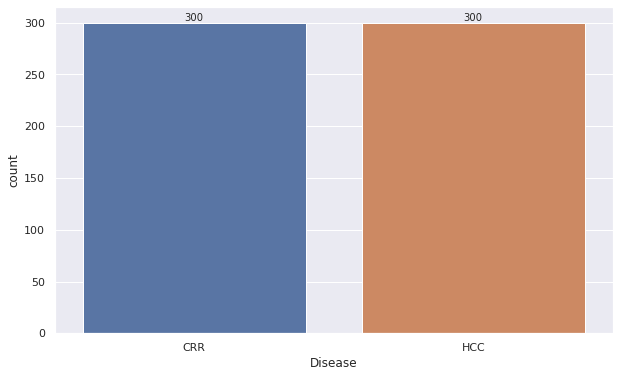

In [24]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=target.name, data=peakTable);
ax.bar_label(ax.containers[0]);

#### Ratio 1:1 between Healthy and Cancer patients --> consider the samples as a set of couples. We have a metadata file in which we have the paired samples, we will use later in the analysis.

# 6 - PCA

Here we want to plot a first PCA. The if statement checks if there are missing data with the <code>plot_infos_missing_values</code> function.
If there is no missing data, the PCA is plotted. Otherwise, missing data imputation has to be performed (a notebook is dedicated to missing value imputation).

In [25]:
plot_PCA(intensities_remove_corr, target=target, dimensions=2)

NaNs in peak table, please impute before using PCA


In [26]:
plot_PCA(intensities_remove_corr, target=target, dimensions=3)

NaNs in peak table, please impute before using PCA


In [27]:
plot_PCA(intensities_remove_corr, target=target, dimensions=3, paired=True)

NaNs in peak table, please impute before using PCA


In [28]:
plot_PCA(intensities_remove_corr, target=target, dimensions=5, paired=True)

NaNs in peak table, please impute before using PCA


Here missing values are 0's, not NaNs so we could have plot PCA but we will still impute missing values before plotting

# 7 - Metadata visualisation

There are only two features in our metadata here so plots below are not so much interesting but further analysis and other plots could be possible if metadata have been larger.

In [29]:
# Count number of occurences of each variable type
metadata.dtypes.value_counts()

object    2
dtype: int64

In [30]:
# Check which variables are of type object (i.e. qualitative)
metadata.dtypes[metadata.dtypes == 'object']

SampleID    object
Disease     object
dtype: object

######################################################################################################################################################
Data types : 
object    2
dtype: int64



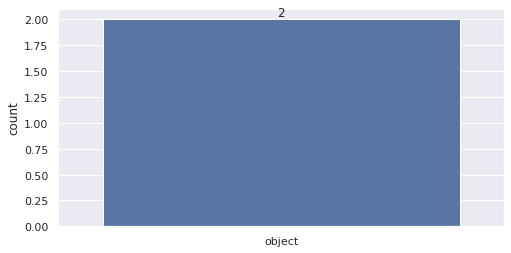

######################################################################################################################################################


In [31]:
# Call plot_feature_types function from explore_data_functions.py script to plot barplot of metadata feature types
plot_feature_types(metadata)

######################################################################################################################################################


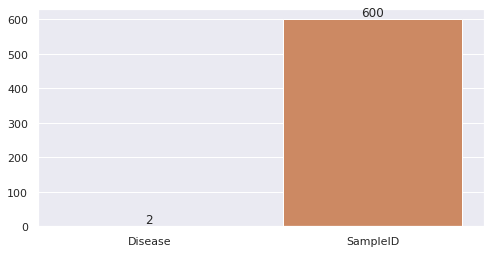

######################################################################################################################################################


In [32]:
# Call plot_nb_unique_qualitative_metadata to plot how many unique values there are for each qualitative metadata feature
plot_nb_unique_qualitative_metadata(metadata)

# 8 - Feature visualisation

The following visualisations show the distributions of the chosen features of the peak table.

## a - Pairplot

Function <code>plot_pairplot_distributions</code> takes as argument the peak table, the target and either the number of features we want to plot or a list of specific features.

We can set the number of features with <code>nb_features</code> parameter, which will plot the first N features of the peak table.

######################################################################################################################################################



<Figure size 720x720 with 0 Axes>

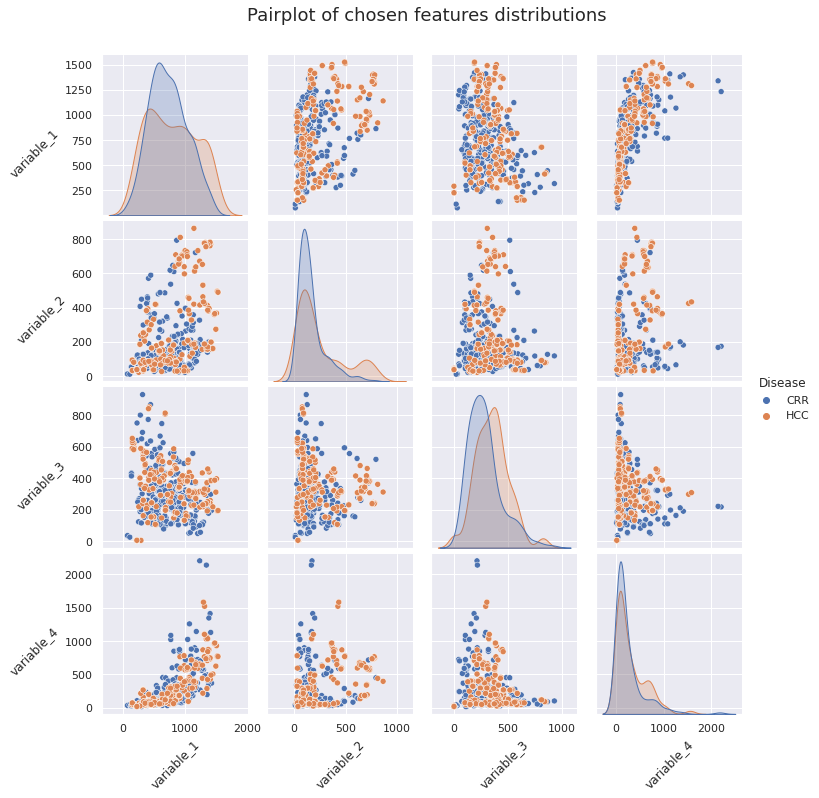

###################################################################################################################################################### 



In [33]:
# Plots pairplot of first 4 features
plot_pairplot_distributions(intensities_remove_corr, target, nb_features=4)

We can also set the list of features we want to plot with <code>list_features</code> parameter.

In [34]:
# Randomly selects 3 features from the peak table
# We could also choose by hand which features we want to plot

n_features = 3

list_features = random.sample(intensities_remove_corr.columns.tolist(), n_features)
list_features

['variable_970', 'variable_1501', 'variable_228']

######################################################################################################################################################



<Figure size 720x720 with 0 Axes>

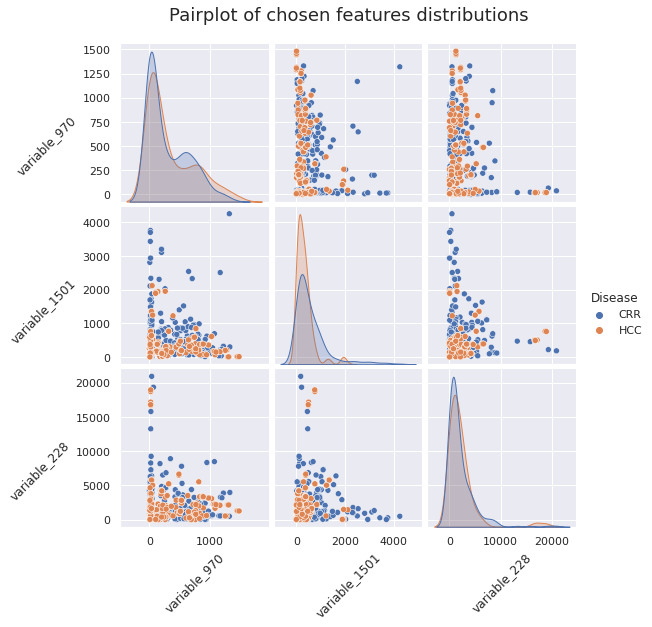

###################################################################################################################################################### 



In [35]:
plot_pairplot_distributions(intensities_remove_corr, target, list_features=list_features)

## b - Histogram and boxplot

Same here for function <code>plot_hist_boxplot_distributions</code>, we can either pass the number of features we want to plot or a list of specific features.

######################################################################################################################################################

------------------------------------------------------------------------------------------------------------------------


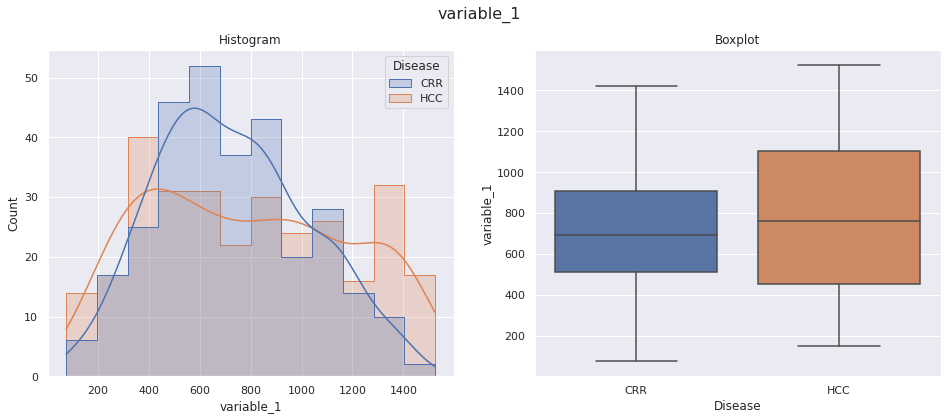

------------------------------------------------------------------------------------------------------------------------


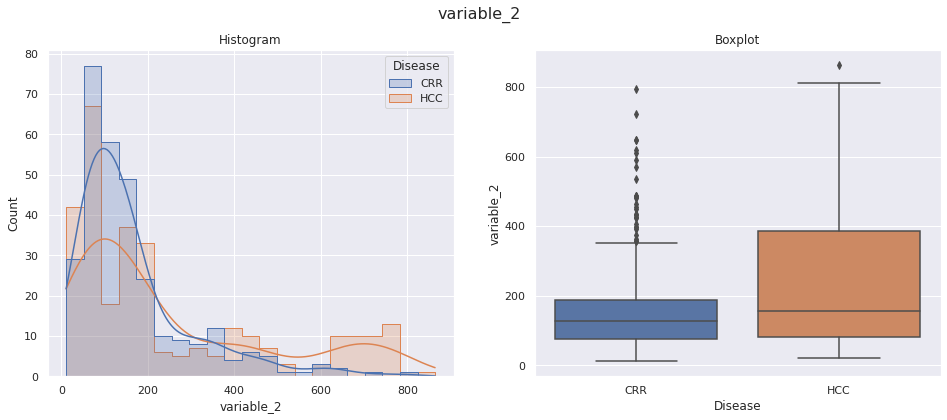

------------------------------------------------------------------------------------------------------------------------


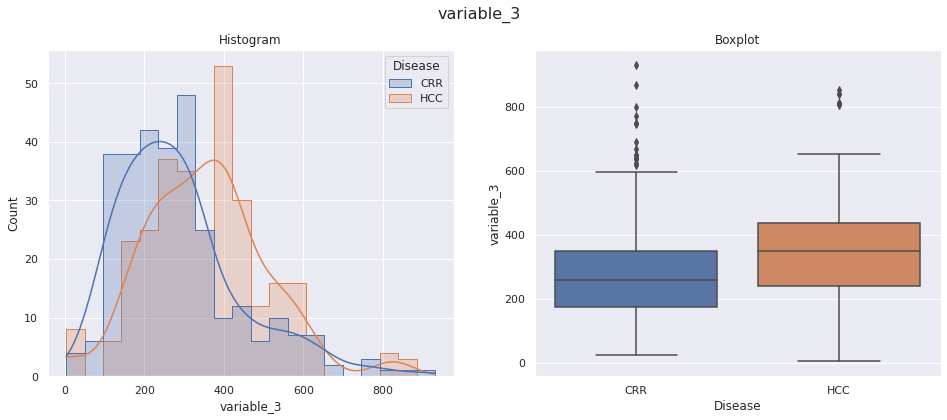

------------------------------------------------------------------------------------------------------------------------


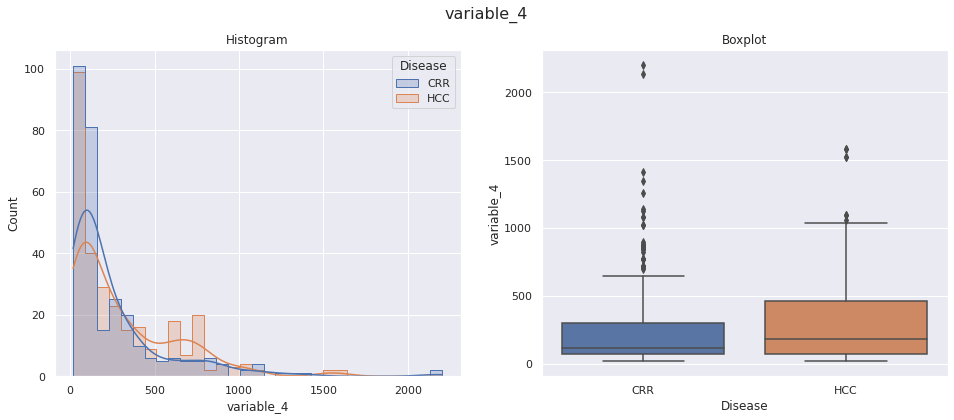

------------------------------------------------------------------------------------------------------------------------ 

######################################################################################################################################################


In [36]:
plot_hist_boxplot_distributions(intensities_remove_corr, target, nb_features=4)

######################################################################################################################################################

------------------------------------------------------------------------------------------------------------------------


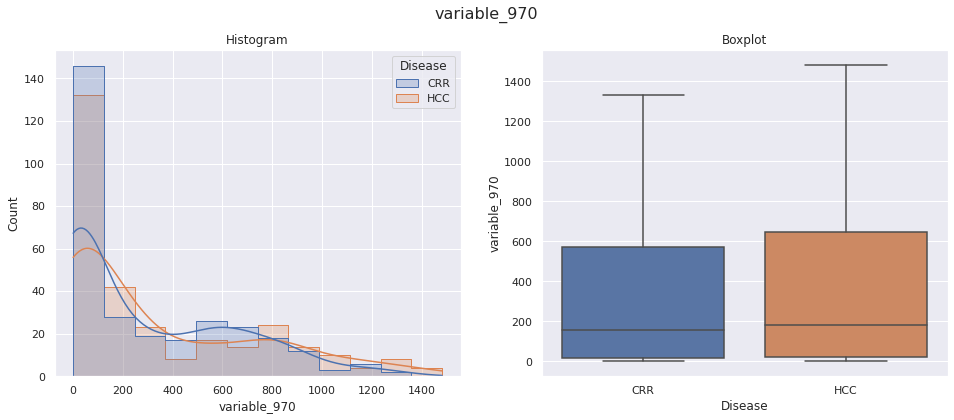

------------------------------------------------------------------------------------------------------------------------


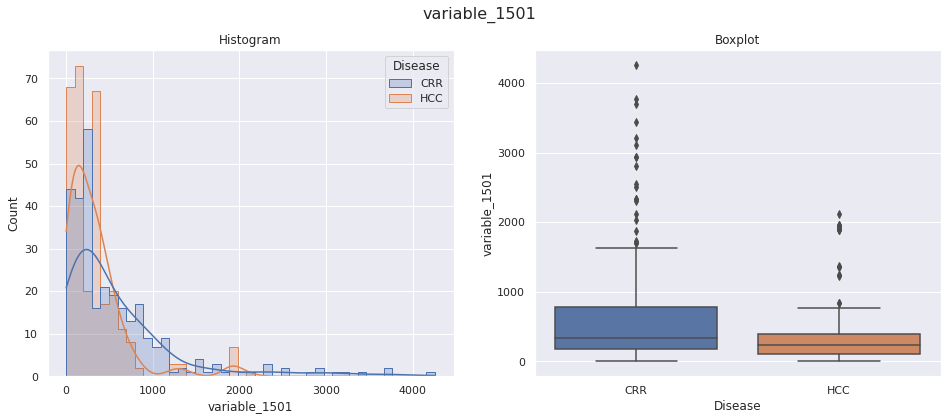

------------------------------------------------------------------------------------------------------------------------


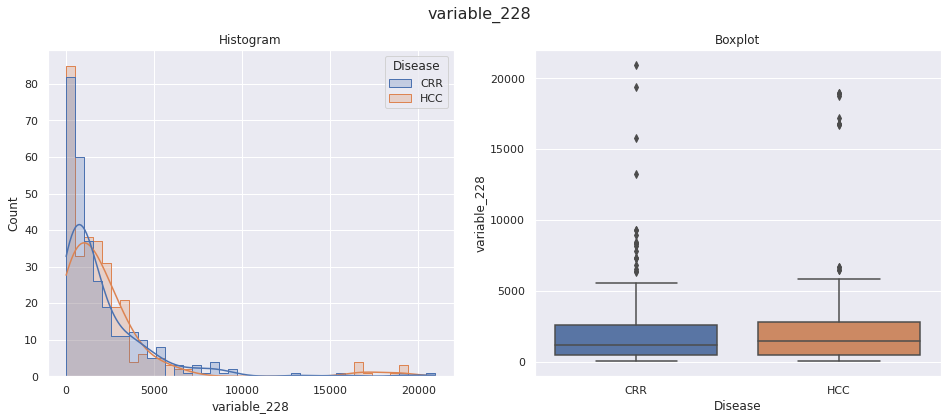

------------------------------------------------------------------------------------------------------------------------ 

######################################################################################################################################################


In [37]:
plot_hist_boxplot_distributions(intensities_remove_corr, target, list_features=list_features)